# **Libraries**

*Set* your local "google_drive_path" that you uploaded the code in it

In [ ]:
Your_google_drive_path="/content/drive/MyDrive/DeepGDPaper"

In [ ]:
from numpy import argmax
import random
import seaborn as sbn
from numpy.random import rand, randn
from scipy.linalg import qr
from numpy import ones
from scipy import stats
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
import  array
import math
from keras.utils import np_utils
from keras.models import Sequential
from sklearn import linear_model
import sklearn
from tabulate import tabulate
from math import sqrt
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.decomposition import PCA as sklearnPCA
import copy
import time
from keras import backend as K
import argparse
import shutil
import warnings
import keras.backend as KeyboardInterrupt
from keras.regularizers import l2
from keras.models import load_model, Model
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
from keras.datasets import mnist, cifar10 , fashion_mnist, cifar100
import sys
from numpy.core.defchararray import array
sys.path.append('..')


!pwd
import os
os.chdir(str(Your_google_drive_path))
!pwd

!pip install pymoo
from pymoo.core.duplicate import ElementwiseDuplicateElimination
from pymoo.core.mutation import Mutation
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.crossover import Crossover
from pymoo.core.sampling import Sampling

/content
/content/drive/MyDrive/sadl11
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.8/566.8 KB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.6/274.6 KB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 KB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.7 MB/s eta 0:00:00
  Preparing m

## **Dataset and Models**

In [ ]:
############################################## Dataset $ model  ########################################################################
#############################################Function description#######################################################################

#________________________________________________(dataset)___________________________________________________________
#It takes the name of the dataset , and corresponding model from the user then it preprocess the dataset and load the model.
#______________Input: arg ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset

#Normalization
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

def dataset(arg, model_name):
  CLIP_MIN = -0.5
  CLIP_MAX = 0.5

  if arg=="mnist":
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    # ##Model
    if model_name=="LeNet1":
        model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    if model_name=="LeNet5":
        model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    ##VGG feature extaction (4068)
    ##rank of features (2476)
    #You can use the stored verion or call vgg function to extract features(to do so comment out the second line)
    # MNIST_VGG=np.load(str(Your_google_drive_path)+"/Extracted Features/MNIST/block5_conv3_3_3_512.npy")
    _,MNIST_VGG=vgg16_features_GD("mnist")
    features_vgg=MNIST_VGG
    y_test = np_utils.to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)  
    y_train = np_utils.to_categorical(y_train, 10)

  if arg=="Fashion_mnist":
    # load dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    _,features_vgg=vgg16_features_GD("Fashion_mnist")
    if model_name=="LeNet4":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
      y_test = np_utils.to_categorical(y_test, 10)
      y_test=np.argmax(y_test, axis=1)  
      y_train = np_utils.to_categorical(y_train, 10)

  
  if arg=="SVHN":
    train_raw = loadmat(str(Your_google_drive_path)+'/Data/train_32x32.mat')
    test_raw = loadmat(str(Your_google_drive_path)+'/Data/test_32x32.mat')
    x_train = np.array(train_raw['X'])
    x_test = np.array(test_raw['X'])
    y_train = train_raw['y']
    y_test = test_raw['y']
    x_train = np.moveaxis(x_train, -1, 0)
    x_test = np.moveaxis(x_test, -1, 0)
    x_test= x_test.reshape (-1,32,32,3)
    x_train= x_train.reshape (-1,32,32,3)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    _,features_vgg=vgg16_features_GD("SVHN")
    if model_name=="LeNet5":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
      lb = LabelBinarizer()
      y_train = lb.fit_transform(y_train)
      y_test = lb.fit_transform(y_test)
      y_test=np.argmax(y_test, axis=1)

  if arg=="cifar10":
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    if model_name=="12Conv":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    if model_name=="ResNet20":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
  
    #VGG feature extaction (4068)
    #rank of features (3845)
    #You can use the stored verion or call vgg function to extract features (comment out the second line)
    # Cifar_VGG=np.load(str(Your_google_drive_path)+"/Extracted Features/Cifar10/x_cifar_inputshape48_block5_conv3.npy")
    _,Cifar_VGG=vgg16_features_GD("cifar10")
    features_vgg=Cifar_VGG
    
    y_test = np_utils.to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)  
    y_train = np_utils.to_categorical(y_train, 10)
  
  x_train = (x_train / 255.0) - (1.0 - CLIP_MAX)
  x_test = (x_test / 255.0) - (1.0 - CLIP_MAX)

  return x_train, y_train, x_test, y_test,features_vgg , model


## **Feature Extraction**

In [ ]:
#________________________________________________(vgg16_features_GD)___________________________________________________________
#It needs the name of the dataset , then it extract the features of this datasets by using VGG16 (the internal layer: 'block5_conv3') 
#to have enough number of features for calculating the GD (geometric diversity score)

#______________Input: arg ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Original Feature Matrix of test inputs of the given dataset (features)
#______________________2- the noramlized version of feature matrix between 0 and 1 (X_scf)


def vgg16_features_GD(arg):

  CLIP_MIN = -0.5
  CLIP_MAX = 0.5
    # lb = LabelBinarizer()
    # train_labels = lb.fit_transform(train_labels)
    # test_labels = lb.fit_transform(test_labels)
  if (arg=="cifar10" or arg=="cifar100" or arg=="SVHN"):
    if(arg=="cifar10"):
      (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    if(arg=="cifar100"):
      (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    if (arg=="SVHN"):
      train_raw = loadmat(str(Your_google_drive_path)+'/Data/train_32x32.mat')
      test_raw = loadmat(str(Your_google_drive_path)+'/Data/test_32x32.mat')
      x_train = np.array(train_raw['X'])
      x_test = np.array(test_raw['X'])
      y_train = train_raw['y']
      y_test = test_raw['y']
      x_train = np.moveaxis(x_train, -1, 0)
      x_test = np.moveaxis(x_test, -1, 0)
      # lb = LabelBinarizer()
      # train_labels = lb.fit_transform(train_labels)
      # test_labels = lb.fit_transform(test_labels)

    x_test1= x_test.reshape (-1,32,32,3)

  if (arg =="mnist" or arg=="Fashion_mnist"):
    if (arg=="mnist"):
      (x_train, y_train), (x_test, y_test) = mnist.load_data()
    if(arg=="Fashion_mnist"):
      (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_test1=np.dstack([x_test]*3)
    x_test1= x_test1.reshape(-1,28,28,3)
    #Resize the images 48*48 as required by VGG16

  x_test1 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test1])
  
  x_test1 = x_test1.astype("float32")
  x_test1 = (x_test1 / 255.0) - (1.0 - CLIP_MAX)
  input_layer=layers.Input(shape=(48,48,3))
  model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
  model_vgg16.summary()
  base_model = model_vgg16
  # You can select another layer of VGG16 that you want to test.
  name_layer = 'block5_conv3'
  intermediate_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer(name_layer).output)
  FF = intermediate_layer_model.predict(x_test1)
  features= FF.reshape((len(x_test1),9*512))
  # print("rank of feature matrix", np.linalg.matrix_rank(features))
  nom = (features-features.min(axis=0))*(1-0)
  denom = features.max(axis=0) - features.min(axis=0)
  denom[denom==0] = 1
  X_scf = nom/denom 
  print(X_scf)
  print("rank of feature matrix", np.linalg.matrix_rank(X_scf))
  
  return features, X_scf

## **Fault definition**


In [ ]:

#________________________________________________(FaultFunction)___________________________________________________________
#It takes the name of the dataset , and corresponding model name then it loads the HDBSCAN clustering results of mispredicted inputs (from fault definition file).
#and it returns all necessary inforamtions about clustering, best clustering results after hyperparameter tuneing (index_clustering) and mispredicted inputs

#______________Input: dataset ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist") model_name("LeNet1", "LeNet5","LeNet4","12Conv","ResNet20" ), dataset ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset




def FaultFunction(data_name,model_name):
  i=0
  if model_name=="LeNet1" and data_name=="mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/top_clustering_label_2coulmns2.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/mis_index_testdataset_MNIST_LeNet1.npy") 
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/mis_index_traindataset_MNIST_LeNet1.npy")
    index_clustering_config=2
  if model_name=="LeNet5" and data_name=="mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/all_test_CL_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/mis_index_testdataset_MNIST.npy",allow_pickle=True)
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/mis_index_traindataset_MNIST.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/top_clustering_label_2coulmns.npy")
    index_clustering_config=4

  if model_name=="12Conv" and data_name=="cifar10":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/Three_clustering_labels3(2coulmns).npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/mis_index_testdatasetcifar.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/mis_index_traindatasetcifar.npy")
    index_clustering_config=0
  if model_name=="ResNet20" and data_name=="cifar10":
    all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/mis_index_testdataset_cifRes.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/mis_index_traindataset_cifRes.npy")
    index_clustering_config=4

  if model_name=="LeNet4" and data_name=="Fashion_mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/mis_index_testdataset_FMNIST.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/mis_index_traindataset_FMNIST.npy")
    index_clustering_config=13
  if model_name=="LeNet5" and data_name=="SVHN":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/mis_index_testdataset_SVHN.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/mis_index_traindataset_SVHN.npy")
    index_clustering_config=15

  noisy_index=[]
  for i in range(len(mis_ind_test)):
    if clustering_result[index_clustering_config][i]==-1:
      noisy_index.append(mis_ind_test[i])
  sett=list(range(0, len(x_test)))
  index_withoutnoisy=set(sett)-set(noisy_index)
  id_test=index_withoutnoisy

  return clustering_result[index_clustering_config],noisy_index, index_withoutnoisy, mis_ind_test, mis_ind_train

# Fault function

In [11]:


def faults(n_samples, sample, mis_i):
  i=0
  pos=0
  neg=0
  i=0
  cluster_lab=[]
  nn=-1
  for l in sample:
    if l in mis_ind_test:
      neg=neg+1 
      # print("index mis",l)
      ind=list(mis_ind_test).index(l)
      if (Clustering_labels[ind]>-1):
        cluster_lab.append(Clustering_labels[ind])
      if (Clustering_labels[ind]==-1):
        cluster_lab.append(nn)
        nn=nn-1
    else:
      pos=pos+1

    # i=i+1 
  faults_n=len(list(set(cluster_lab)))
 
  cluster_1noisy=copy.deepcopy(cluster_lab)
  for i in range(len(cluster_1noisy)):
   if cluster_1noisy[i] <=-1:
     cluster_1noisy[i]=-1
  faults_1noisy=len(list(set(cluster_1noisy)))
  return faults_n,faults_1noisy, neg

# Fitness Functions

In [13]:

############################################################## Gini score  ##############################################################################


def gini_score(Output_probability):
  gini_scores=[]
  for i in range(len(Output_probability)):
    sum=0
    for j in range(len(Output_probability[0])):
      sum= sum + Output_probability[i][j]**2
    gini_scores.append(1-sum)
  return gini_scores


In [14]:

############################################################## Geometric diversity ##############################################################

def GD(IDs, features):
  
  x_sample = np.zeros((len(IDs),len(list(features[0]))))
  conv_output=np.array(features)
  i=0
  for L in IDs :
    x_sample[i]=conv_output[L]
    i=i+1
  dot_p=np.dot(x_sample,x_sample.T)
  sign, Log_det=np.linalg.slogdet(dot_p)

  return Log_det



#**Main (Call Functions)**

In [15]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [16]:
1############################################################## Call_functions  ##########################################

data_name=input("Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : ")
model_name=input("Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : ")
x_train, y_train, x_test, y_test, features, model= dataset(data_name, model_name)
print(data_name, model_name)
model.summary()
print("x_test.shape", x_test.shape)
Clustering_labels, noisy_index , index_withoutnoisy, mis_ind_test, mis_ind_train= FaultFunction(data_name, model_name)
Clustering_labels=Clustering_labels[:len(mis_ind_test)]

Output_probability=model.predict(x_test)
Gini_scores=gini_score(Output_probability)

Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : mnist
Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : LeNet5
11490434/11490434 [==============================] - 0s 0us/step
mnist LeNet5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 activation_10 (Activation)  (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        2416      
                                            

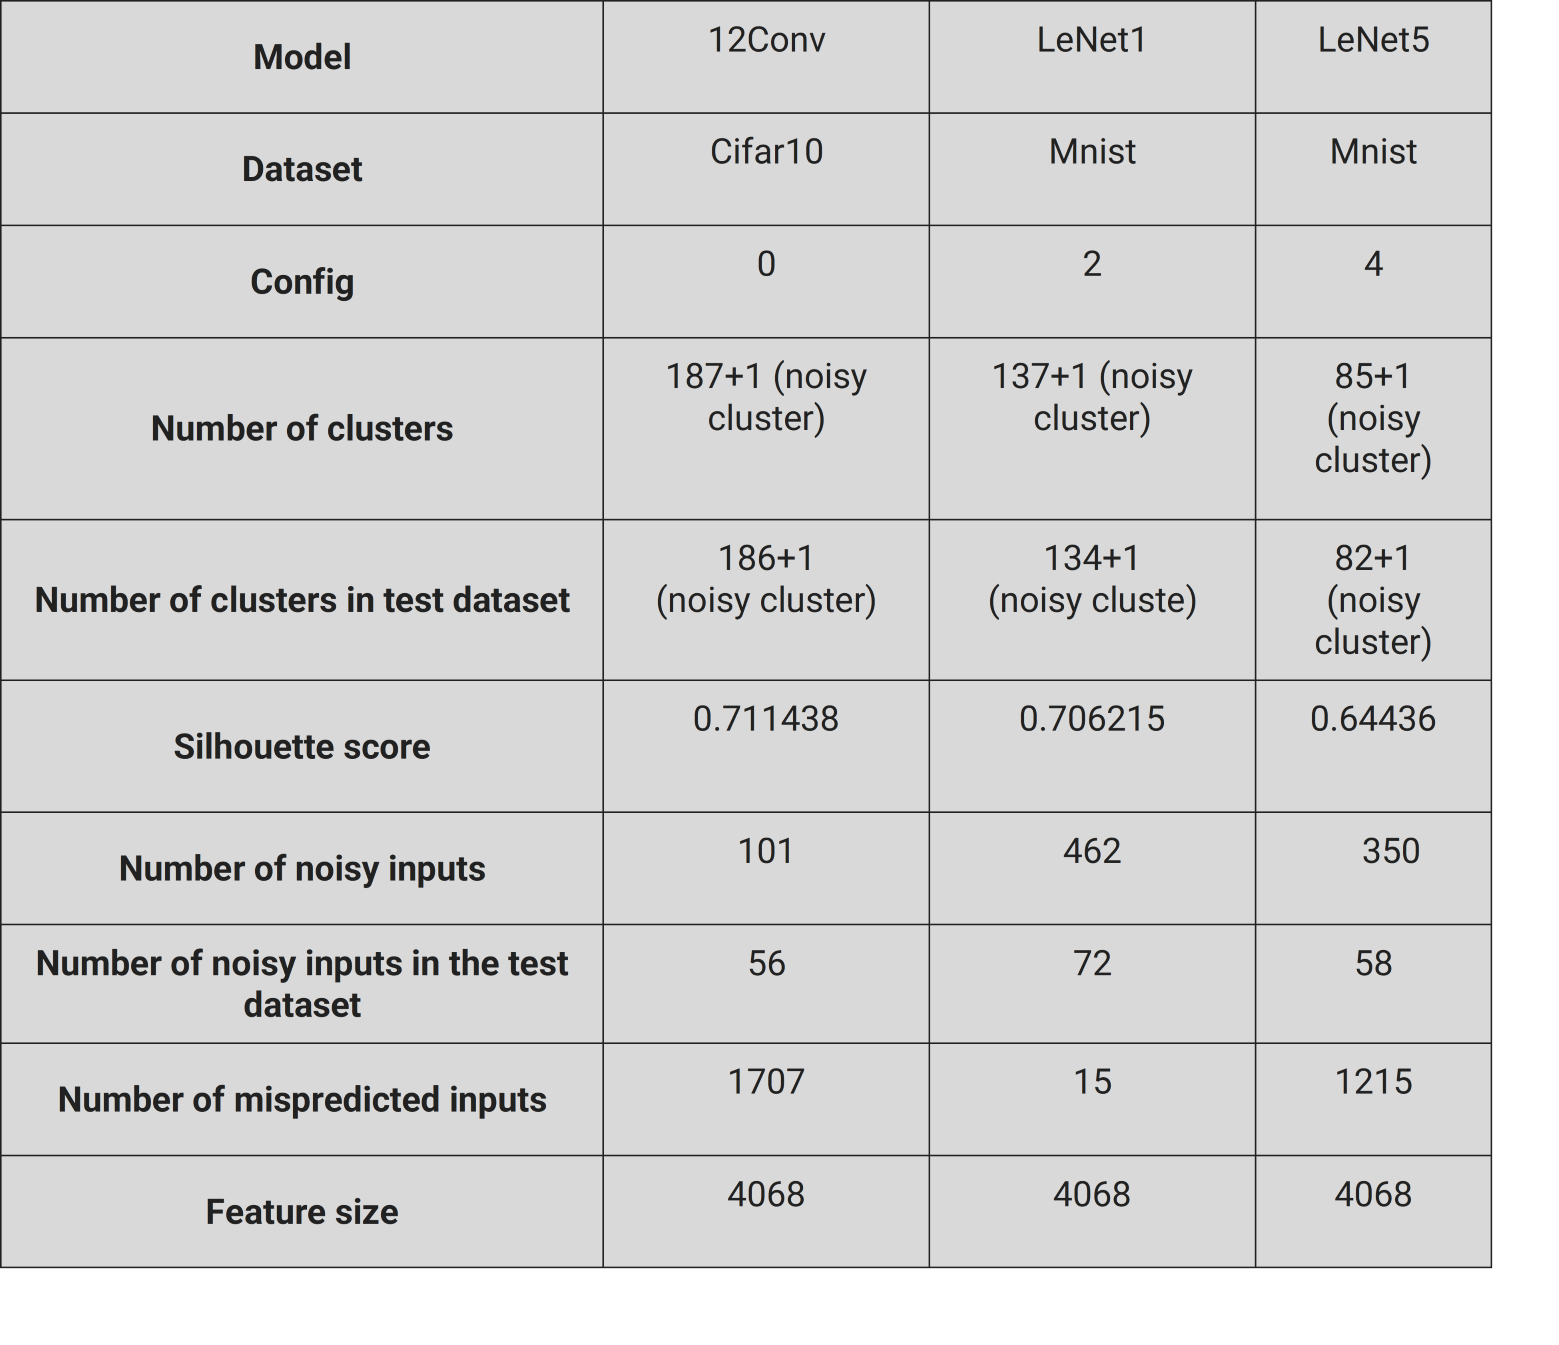

In [17]:
noisy_index=[]
sss=[]
for i in range(len(mis_ind_test)):
  sss.append(Clustering_labels[i])
  if Clustering_labels[i]==-1:
    noisy_index.append(mis_ind_test[i])
sett=list(range(0, len(x_test)))
index_withoutnoisy=set(sett)-set(noisy_index)

# **DeepGD**

**Hyper parameters**

In [ ]:
ID=4
size_ind=500
n_gen=300
p_size=700
n_off=500
m_rate=0.7

## Problem definition
### Fitness functions 

In [ ]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=size_ind, n_obj=2, n_constr=0,xl=0, xu=len(x_test)-1, type_var=list)

    def _evaluate(self, x, out, *args, **kwargs):
      
        sum=0
        for c in x:
          sum=sum+ Gini_scores[c]
        Ave_gini=sum/len(x)
        div_score= GD(x, features)
        fit1 = Ave_gini
        fit2 = abs(div_score)

        out["F"] = np.array([-fit1, -fit2], dtype=float)
problem=MyProblem()

## Initial population


In [ ]:
class MySampling(Sampling):

    def _do(self, problem, n_samples, **kwargs):
        X=np.full((n_samples,problem.n_var), None, dtype=object)

        for i in range(n_samples):
          X[i]=np.asarray(random.sample(index_withoutnoisy,problem.n_var))
        return X

## Crossover


In [ ]:


class MyCrossover(Crossover):
    def __init__(self):
        # define the crossover: number of parents and number of offsprings
        super().__init__(2, 2)

    def _do(self, problem, X, **kwargs):
        jj=0
        # The input of has the following shape (n_parents, n_matings, n_var)
        _, n_matings, n_var = X.shape
        def pri(xx):
          gini_X=[Gini_scores[i] for i in xx]
          zipped_lists = zip(gini_X,xx)
          #sort from the highest gini score to the lowest
          sorted_zipped_lists = sorted(zipped_lists, reverse=True)
          sorted_list1 = [element for _, element in sorted_zipped_lists]
          return sorted_list1
        # The output owith the shape (n_offsprings, n_matings, n_var)
        Y = np.full_like(X, None, dtype=object)
        # # for each mating provided
        for k in range(n_matings):
            a = pri(X[0,k])
            b = pri(X[1,k])
            crossoverpoint = random.randint(1, (n_var-1))
            off1 = list(a[:crossoverpoint])+list(b[:len(b)-crossoverpoint])
            off2 = list(b[len(b)-crossoverpoint:])+list(a[crossoverpoint:])
            # # prepare the offsprings
            
            off1_final=off1
            off2_final=off2

            jj=jj+1
              # join the character list and set the output
            if len(set(off1))<n_var:
              Rsize=n_var-len(set(off1))
              off1_replace=random.sample(set(set(index_withoutnoisy)-set(off1)),Rsize)
              off1=list(set(off1))
              off1.extend(set(off1_replace))
            if len(set(off2))<n_var:
              Rsize=n_var-len(set(off2))
              off2_replace=random.sample(set(set(index_withoutnoisy)-set(off2)),Rsize)
              off2=list(set(off2))
              off2.extend(set(off2_replace))

            Y[0, k], Y[1, k] = np.array(off1), np.array(off2)
        return Y

## Mutation

In [ ]:


class MyMutation(Mutation):
    def __init__(self):
        super().__init__()

    def _do(self, problem, X, **kwargs):

      def pri(xx):
          gini_X=[Gini_scores[i] for i in xx]
          zipped_lists = zip(gini_X,xx)
          #sort from the highest gini score to the lowest
          sorted_zipped_lists = sorted(zipped_lists, reverse=True)
          sorted_list1 = [element for _, element in sorted_zipped_lists]
          return sorted_list1

      mutation_rate= m_rate
      mut=np.full_like(X, None, dtype=object)
      for i in range(len(X)):
          random_value=random.random()
          N_least=5
          ff =len(X[i])-N_least
          gd_scores_mut=[]
          xx=pri(X[i])
          if random_value <= mutation_rate:
            while ff<len(X[i]):
              b = xx[:ff] + xx[ff+1:]
              ss=GD(b, features)
              gd_scores_mut.append(ss)
              ff=ff+1
            xx[len(X[i])-N_least+gd_scores_mut.index(max(gd_scores_mut))]=random.choice(list(set(index_withoutnoisy)-set(X[i])))
            mut[i]=np.array(xx)
          else:
            mut[i]=X[i]
      ###########################################
      
      return mut

In [ ]:
class MyDuplicateElimination(ElementwiseDuplicateElimination):

    def is_equal(self, a, b):

      if all(a.X==b.X):
        return True
      else:
        return False

## **Results**

In [ ]:
import string
import numpy as np
from pymoo.factory import get_sampling
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize


algorithm = NSGA2(pop_size=p_size,
                  n_offsprings=n_off,
                  sampling=MySampling(),
                  crossover=MyCrossover(),
                  mutation=MyMutation(),
                  eliminate_duplicates=MyDuplicateElimination())

res = minimize(problem,
               algorithm,
               ('n_gen', n_gen),
               verbose=False)

In [ ]:
F = res.F
X=res.X

# **Analysing and Visualizing of the results**

### Loading the results

In [5]:
#################################################################Loading results of NsgaII#######################################################################
###################################################you can chnage the size of selected subset######################################################################
Size_s=100
################################################## IDD from 1 to 5 (5 different repeation of the method ################################################################################
IDD=1
# data_name="mnist"
# model_name="LeNet5"

# F= np.load(str(Your_google_drive_path)+"/Result_DeepGD/"+ str(data_name)+"_"+str(model_name) +"/Fitness_S"+str(Size_s)+"ID"+str(IDD)+"P700Of500n300M0.7.npy")
# X=np.load(str(Your_google_drive_path)+"/Result_DeepGD/"+ str(data_name)+"_"+str(model_name) +"/X_S"+str(Size_s)+"ID"+str(IDD)+"P700Of500n300M0.7.npy", allow_pickle=True)


### Selecting the best individual
(we have all final subsets on pareto front)

In [24]:
from pymoo.visualization.scatter import Scatter

print("Function value: %s" % F)
#sort based on the highest gini score
results = X[np.argsort(F[:, 0])]
print(results)
a=[]
b=[]
c=[]

gg=np.zeros((len(F),4))
for i in range(len(F)):
  rr=X[np.argsort(F[:,0])][i]
  fa,_,mis=faults(len(rr), rr, mis_ind_test)
  kk=copy.deepcopy(F)
  jj=list(kk[kk[:, 0].argsort()][i])
  jj.append(int(fa))
  jj.append(int(mis))
  gg[i]=jj
  
from tabulate import tabulate
col_names = ["Gini score", "Diversity score", "Number of faults","Number of mispredicted inputs"]
  
#display table
print(tabulate(gg, headers=col_names, tablefmt="fancy_grid"))




Function value: [[  -0.81343376 -303.78374601]
 [  -0.82096883 -284.90257125]
 [  -0.81311933 -304.39882253]
 [  -0.81464601 -298.49638209]
 [  -0.81832195 -292.98489376]
 [  -0.80844604 -313.94586179]
 [  -0.81608857 -295.15961843]
 [  -0.79156325 -328.32048859]
 [  -0.79989679 -322.45602983]
 [  -0.82095573 -286.69167099]
 [  -0.80832269 -314.12041458]
 [  -0.81570272 -296.1285895 ]
 [  -0.8196587  -291.42720761]
 [  -0.80245982 -319.88921837]
 [  -0.82100916 -283.66687582]
 [  -0.7698642  -337.80488367]
 [  -0.80944311 -312.91535971]
 [  -0.78057729 -335.39190694]
 [  -0.80661127 -317.4475146 ]
 [  -0.80143733 -321.5100044 ]
 [  -0.77995635 -335.74501131]
 [  -0.81259136 -304.86207234]
 [  -0.79699863 -323.53642779]
 [  -0.81940203 -292.5558034 ]
 [  -0.81778775 -293.52714862]
 [  -0.80080942 -322.13337767]
 [  -0.78176528 -334.15851416]
 [  -0.77235234 -337.16499772]
 [  -0.77126462 -337.26018611]
 [  -0.7762128  -336.10645687]
 [  -0.80732928 -316.67481848]
 [  -0.80408405 -319.31

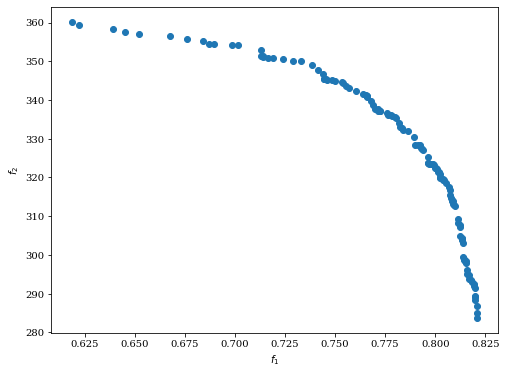

In [40]:
Scatter().add(F*-1).show()

first method
Optimal selected naswer: Number of fault in the final selected subset: 30 the number of mispredicted inputs in the final subset 57
second method
Optimal selected naswer: Number of faults in the final selected subset: 30 the number of mispredicted inputs in the final subset 59
Best regarding Pseudo Weights: Point 
i = 21
F = [  -0.81259136 -304.86207234]


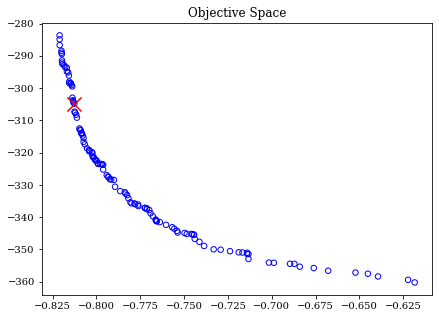

In [61]:
from pymoo.visualization.scatter import Scatter

# selecting from pareto front
# Op1
print("first method")
_,NumFault,NumMis=faults(len(X[0]), X[0], mis_ind_test)
print("Optimal selected naswer:", "Number of fault in the final selected subset:" ,NumFault,"the number of mispredicted inputs in the final subset", NumMis)
#Op2
print("second method")
_,NumFault,NumMis=faults(len(X[i]), X[i], mis_ind_test)
print("Optimal selected naswer:", "Number of faults in the final selected subset:" ,NumFault,"the number of mispredicted inputs in the final subset", NumMis)
fl = F.min(axis=0)
fu = F.max(axis=0)
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)
fl = nF.min(axis=0)
fu = nF.max(axis=0)

opt_rate=0.77
weights = np.array([opt_rate, 1-opt_rate])
from pymoo.mcdm.pseudo_weights import PseudoWeights

i = PseudoWeights(weights).do(nF)
print("Best regarding Pseudo Weights: Point \ni = %s\nF = %s" % (i, F[i]))
loc_ind=[x for x, y in enumerate(a) if y[0] == F[i][0]]
# print(X[loc_ind[0]])
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()
